In [3]:
pip install tcrdist3

  Using cached tcrdist3-0.2.2-py3-none-any.whl
  Obtaining dependency information for parasail>=1.1.17 from https://files.pythonhosted.org/packages/7d/3d/3fb505271ca157798326c3f4c357ccde2c1c6f05f05400aa19e3e55bbd01/parasail-1.3.4-py2.py3-none-win_amd64.whl.metadata
  Using cached parasail-1.3.4-py2.py3-none-win_amd64.whl.metadata (21 kB)
  Obtaining dependency information for pwseqdist>=0.6 from https://files.pythonhosted.org/packages/8c/89/562baae49ee0cce948b522f86647a605946ea6e3e61382cb669e5a87d1d0/pwseqdist-0.6-py3-none-any.whl.metadata
  Using cached pwseqdist-0.6-py3-none-any.whl.metadata (1.8 kB)
  Obtaining dependency information for zipdist>=0.1.5 from https://files.pythonhosted.org/packages/ca/a7/2c4907e3f5389664c67e533286c77c69a1b005bd112dee5488f7bfb8ee66/zipdist-0.1.5-py3-none-any.whl.metadata
  Using cached zipdist-0.1.5-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fishersapi from https://files.pythonhosted.org/packages/ee/6b/f562f21ed6f6dc8e4ab

In [4]:
#pip install pandas-profiling==3.6.2

In [102]:
from tcrdist.repertoire import TCRrep
from tcrdist.plotting import plot_pairings, _write_svg
import pandas as pd
from tcrdist.repertoire import TCRrep

In [308]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [31]:
df_copy= pd.read_csv('vdjdb.txt',sep='\t')

profile=ProfileReport(df,title='data report')

In [9]:
df.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no


In [14]:
len(df)

92771

In [33]:
#df1=df[['antigen.epitope','antigen.gene','antigen.species']]

proof reference for the making the HIV and HIV-1 and HIV1 are the same 
 - https://www.aidsmap.com/about-hiv/hiv-1-and-hiv-2#:~:text=HIV%2D1%20comprises%20groups%20M,2%20subtypes%2C%20A%20and%20B.&text=Due%20to%20the%20genetic%20difference,not%20reliably%20detect%20HIV%2D2.
 - https://www.frontiersin.org/articles/10.3389/fimmu.2019.02820/full(Using random forest)

In [16]:
df1=df[df['vdjdb.score'].isin([2, 3,1])]

In [17]:
len(df1)

12414

In [ ]:

df1 = df.drop(['reference.id', 'method', 'meta','cdr3fix','','',''], axis=1)

In [60]:
df['antigen.species'].unique()

array(['HIV-1', 'TriticumAestivum', 'CMV', 'SARS-CoV-2', 'HomoSapiens',
       'EBV', 'M.tuberculosis', 'HTLV-1', 'GallusGallus', 'MusMusculus',
       'InfluenzaA', 'Synthetic', 'VSV', 'SaccharomycesCerevisiae',
       'ManducaSexta', 'HCV', 'synthetic', 'E.Coli', 'HHV', 'LCMV',
       'DENV1', 'DENV3/4', 'PlasmodiumBerghei',
       'SelaginellaMoellendorffii', 'PseudomonasFluorescens',
       'PseudomonasAeruginosa', 'HIV1', 'Homo sapiens', 'YFV', 'RSV',
       'HSV-2', 'DENV2', 'HPV-16', 'MCMV', 'MCPyV', 'HPV',
       'StreptomycesKanamyceticus', 'Wheat', 'HIV', 'HCoV-HKU1', 'SIV',
       'AdV'], dtype=object)

df2=df.copy()
for i in range(0,len(df1)):
    j=df2['antigen.species'][i]
    if j == 'HIV1' or j=='HIV':
        df2['antigen.species'][i]='HIV-1'

Since the there only 2 distint values in "Gene" variable, we will be implementing 1 hot encoding  

In [61]:
df2.columns

Index(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'mhc.a',
       'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'],
      dtype='object')

In [70]:
cdr_sequence=pd.DataFrame()

In [71]:
cdr_sequence=df2['cdr3']

In [72]:
amino_acids = [cdr_sequence[i:i+3] for i in range(0, len(cdr_sequence), 3)]

pandas.core.series.Series

In [74]:
cdr_sequence.join(amino_acids)

AttributeError: 'Series' object has no attribute 'join'

In [58]:
Encoded_df= pd.get_dummies(df2,dtype='int',columns=['gene', 'species'])

In [59]:
Encoded_df

,complex.id,cdr3,v.segm,j.segm,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp,gene_TRA,gene_TRB,species_HomoSapiens,species_MacacaMulatta,species_MusMusculus
0,1,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no,1,0,1,0,0
1,1,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no,0,1,1,0,0
2,0,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no,0,1,1,0,0
3,2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no,1,0,1,0,0
4,2,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no,0,1,1,0,0
92767,30593,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no,1,0,1,0,0
92768,30593,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no,0,1,1,0,0
92769,30594,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no,1,0,1,0,0


In [79]:
import numpy as np

# Define the amino acid alphabet
amino_acid_alphabet = 'ACDEFGHIKLMNPQRSTVWY'

def cdr_to_one_hot(cdr_sequence):
    one_hot_encoding = np.zeros((len(cdr_sequence), len(amino_acid_alphabet)))

    for i, amino_acid in enumerate(cdr_sequence):
        #print(i,amino_acid)
        if amino_acid in amino_acid_alphabet:
            index = amino_acid_alphabet.index(amino_acid)
            one_hot_encoding[i, index] = 1

    return one_hot_encoding

# Example CDR sequence
cdr_sequence = "CASSYLPGQGDHYSNQPQHF"

# Convert CDR sequence to one-hot representation
one_hot_representation = cdr_to_one_hot(cdr_sequence)

# Display the result
print("CDR Sequence:", cdr_sequence)
print("One-Hot Representation:")
print(one_hot_representation)

CDR Sequence: CASSYLPGQGDHYSNQPQHF
One-Hot Representation:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 

### Similarity Distance

In [32]:
df=df_copy.copy()

In [34]:
df=df.dropna()
df=df[df['vdjdb.score']!=0]

In [79]:
df1 = df.drop(['reference.id', 'method', 'meta','cdr3fix','vdjdb.score','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp'], axis=1)

In [80]:
df_aa= df1[df1['gene']=='TRA']
df_bb= df1[df1['gene']=='TRB']

## Alpha Chain

In [99]:
df_alpha=df_aa.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_a_gene','j.segm': 'j_a_gene','cdr3': 'cdr3_a_aa','species':'subject'})

In [100]:
df_alpha = df_alpha.drop(['complex.id', 'gene', 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [101]:
df_alpha

,cdr3_a_aa,v_a_gene,j_a_gene,subject,epitope
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL
3,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL
7,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL
9,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL
12,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL
...,...,...,...,...,...
92681,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL
92683,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP
92685,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP
92689,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY


### Mouse

In [304]:
df_am=df_alpha[df_alpha['subject']=='MusMusculus']
df_am=df_am.drop(['subject'], axis=1)

In [306]:
tr_am = TCRrep(cell_df = df_am,
            organism = 'mouse',
            chains = ['alpha'],
            db_file = 'alphabeta_gammadelta_db.tsv')
#tr_am.pw_alpha
tr_am.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x00000247B89C9F80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 24, 24, ..., 36, 36, 23],
       [24,  0, 20, ..., 12, 12, 30],
       [24, 20,  0, ..., 34, 36, 26],
       ...,
       [36, 12, 34, ...,  0,  4, 33],
       [36, 12, 36, ...,  4,  0, 35],
       [23, 30, 26, ..., 33, 35,  0]], dtype=int16)

In [309]:
np.savetxt('Alpha_mouse.csv',tr_am.pw_cdr3_a_aa,delimiter=',',fmt='%d')

### Human

In [311]:
df_ah=df_alpha[df_alpha['subject']=='HomoSapiens']
df_ah=df_h.drop(['subject'], axis=1)

KeyError: "['subject'] not found in axis"

In [312]:
tr_ah = TCRrep(cell_df = df_ah,
            organism = 'human',
            chains = ['alpha'],
            db_file = 'alphabeta_gammadelta_db.tsv')
#tr_ah.pw_alpha
tr_ah.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x00000247B89C9F80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 30, 30, ..., 33, 28, 36],
       [30,  0,  0, ..., 31, 32, 35],
       [30,  0,  0, ..., 31, 32, 35],
       ...,
       [33, 31, 31, ...,  0, 32, 19],
       [28, 32, 32, ..., 32,  0, 35],
       [36, 35, 35, ..., 19, 35,  0]], dtype=int16)

In [313]:
np.savetxt('Alpha_human.csv',tr_ah.pw_cdr3_a_aa,delimiter=',',fmt='%d')

## Beta Chain

In [120]:
df_bb=df_bb.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_b_gene','j.segm': 'j_b_gene','cdr3': 'cdr3_b_aa','species':'subject'})

In [121]:
df_Beta = df_bb.drop(['complex.id', 'gene', 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

### Mouse

In [122]:
df_bm=df_Beta[df_Beta['subject']=='MusMusculus']
df_bm=df_bm.drop(['subject'], axis=1)

In [125]:
tr_bm = TCRrep(cell_df = df_bm,
            organism = 'mouse',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bm.pw_beta
tr_bm.pw_cdr3_b_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x00000247B89C9F80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 32, 25, ..., 47, 47, 31],
       [32,  0, 24, ..., 35, 31, 31],
       [25, 24,  0, ..., 39, 39, 34],
       ...,
       [47, 35, 39, ...,  0,  5, 35],
       [47, 31, 39, ...,  5,  0, 35],
       [31, 31, 34, ..., 35, 35,  0]], dtype=int16)

In [314]:
np.savetxt('Beta_mouse.csv',tr_bm.pw_cdr3_b_aa,delimiter=',',fmt='%d')

### Human

In [126]:
df_bh=df_Beta[df_Beta['subject']=='HomoSapiens']
df_bh=df_bh.drop(['subject'], axis=1)

In [127]:
tr_bh = TCRrep(cell_df = df_bh,
            organism = 'human',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bh.pw_beta
tr_bh.pw_cdr3_b_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x00000247B89C9F80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 38, 36, ..., 40, 34, 33],
       [38,  0, 23, ..., 40, 32, 36],
       [36, 23,  0, ..., 52, 36, 26],
       ...,
       [40, 40, 52, ...,  0, 35, 47],
       [34, 32, 36, ..., 35,  0, 32],
       [33, 36, 26, ..., 47, 32,  0]], dtype=int16)

### Alpha and Beta Chain

In [239]:
df_a_b = df1.loc[(df1['complex.id']!=0)]
df_a_b=df_a_b.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_a_gene','j.segm': 'j_a_gene','cdr3': 'cdr3_a_aa','species':'subject'})

In [286]:
df_a_b

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,subject,epitope
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL
6,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL
...,...,...,...,...,...,...,...
92686,30552,TRB,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,FPQPEQPFPWQP
92689,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY
92690,30554,TRB,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,QLQPFPQPELPY
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,PQQPFPQPEQPFP


In [240]:
df_a_b = df_a_b.drop([ 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [241]:
df_paired_alpha=df_a_b.loc[df_a_b.gene=='TRA']
df_paired_beta=df_a_b.loc[df_a_b.gene=='TRB']

In [242]:
df_paired_ab=pd.merge(df_paired_alpha, df_paired_beta, on='complex.id', how='outer')
df_paired_ab1=df_paired_ab.dropna()
df_paired_ab1 = df_paired_ab1.drop([ 'gene_x','subject_x','epitope_x','gene_y','complex.id'], axis=1)
df_paired_ab1=df_paired_ab1.rename(columns={'cdr3_a_aa_x':'cdr3_a_aa','cdr3_a_aa_y':'cdr3_b_aa','v_a_gene_x': 'v_a_gene', 'j_a_gene_x': 'j_a_gene','v_a_gene_y': 'v_b_gene','cdr3': 'cdr3_a_aa','j_a_gene_y':'j_b_gene','epitope_y':'epitope'})

In [243]:
df_paired_ab1 

,cdr3_a_aa,v_a_gene,j_a_gene,cdr3_b_aa,v_b_gene,j_b_gene,subject_y,epitope
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL
1,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL
3,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,FLKEKGGL
4,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEQGGL
5,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEQGGL
...,...,...,...,...,...,...,...,...
2902,CIALNARLMF,TRAV26-1*01,TRAJ31*01,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01,HomoSapiens,PQPELPYPQPQL
2903,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01,HomoSapiens,FPQPEQPFPWQP
2904,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,FPQPEQPFPWQP
2905,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,HomoSapiens,QLQPFPQPELPY


In [295]:
tr_bhm_ab = TCRrep( 
            cell_df = df_paired_ab1,
            chains = ['alpha','beta'],
            organism = 'mouse',
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bhm_ab.pw_beta
#tr_bm_ab.pw_cdr3_b_aa
tr_bhm_ab.pw_alpha
#tr_bm_ab.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRAV26-1*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRAV38-2/DV8*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRAV22*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 

array([[  0, 112, 109, ..., 125, 117, 160],
       [112,   0,  99, ..., 146, 115, 139],
       [109,  99,   0, ..., 129, 109, 132],
       ...,
       [125, 146, 129, ...,   0, 108, 131],
       [117, 115, 109, ..., 108,   0,  89],
       [160, 139, 132, ..., 131,  89,   0]], dtype=int16)

### Mouse

In [244]:
df_ab_bm=df_paired_ab1 [df_paired_ab1 ['subject_y']=='MusMusculus']
df_ab_bm=df_ab_bm.drop(['subject_y'], axis=1)

tr_bm_ab = TCRrep(cell_df = df_ab_bm,
            organism = 'mouse',
            chains = ['alpha','beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bm_ab.pw_beta
#tr_bm_ab.pw_cdr3_b_aa
tr_bm_ab.pw_alpha
#tr_bm_ab.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x00000247B89C9F80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[  0, 112, 109, ..., 164, 164, 125],
       [112,   0,  99, ...,  92,  92, 146],
       [109,  99,   0, ..., 153, 159, 129],
       ...,
       [164,  92, 153, ...,   0,  12,  99],
       [164,  92, 159, ...,  12,   0, 105],
       [125, 146, 129, ...,  99, 105,   0]], dtype=int16)

In [247]:
mouse_paired=tr_bm_ab.pw_beta+tr_bm_ab.pw_alpha
mouse_paired

array([[  0, 247, 244, ..., 299, 299, 203],
       [247,   0, 111, ..., 243, 107, 293],
       [244, 111,   0, ..., 304, 162, 276],
       ...,
       [299, 243, 304, ...,   0, 163, 240],
       [299, 107, 162, ..., 163,   0, 252],
       [203, 293, 276, ..., 240, 252,   0]], dtype=int16)

In [267]:
mouse_paired.shape

(789, 789)

### Human

In [322]:
df_ab_bh=df_paired_ab1 [df_paired_ab1 ['subject_y']=='HomoSapiens']
df_ab_bh=df_ab_bh.drop(['subject_y'], axis=1)

print(df_ab_bh.head())

tr_bh_ab = TCRrep(cell_df = df_ab_bh,
            organism = 'human',
            chains = ['alpha','beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bh_ab.pw_beta
#tr_bm_ab.pw_cdr3_b_aa
#tr_bh_ab.pw_alpha
tr_bh_ab.pw_cdr3_a_aa

        cdr3_a_aa         v_a_gene   j_a_gene             cdr3_b_aa  \
0   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  CASSYLPGQGDHYSNQPQHF   
1  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   CASSFEPGQGFYSNQPQHF   
3   CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01        CASSALASLNEQFF   
4   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  CASSYLPGQGDHYSNQPQHF   
5  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   CASSFEPGQGFYSNQPQHF   

    v_b_gene    j_b_gene   epitope  count  
0  TRBV13*01  TRBJ1-5*01  FLKEKGGL      1  
1  TRBV13*01  TRBJ1-5*01  FLKEKGGL      1  
3  TRBV14*01  TRBJ2-1*01  FLKEKGGL      1  
4  TRBV13*01  TRBJ1-5*01  FLKEQGGL      1  
5  TRBV13*01  TRBJ1-5*01  FLKEQGGL      1  


C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x00000247B89C9F80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 24, 32, ..., 33, 28, 36],
       [24,  0, 24, ..., 25, 30, 31],
       [32, 24,  0, ..., 24, 25, 26],
       ...,
       [33, 25, 24, ...,  0, 32, 19],
       [28, 30, 25, ..., 32,  0, 35],
       [36, 31, 26, ..., 19, 35,  0]], dtype=int16)

In [323]:
len(df_ab_bh)

1817

In [324]:
len(tr_bh_ab.pw_cdr3_a_aa)

1462

In [299]:
ep_ab_human=df_ab_bh['epitope']

In [300]:
ep_ab_human

0            FLKEKGGL
1            FLKEKGGL
3            FLKEKGGL
4            FLKEQGGL
5            FLKEQGGL
            ...      
2902     PQPELPYPQPQL
2903     FPQPEQPFPWQP
2904     FPQPEQPFPWQP
2905     QLQPFPQPELPY
2906    PQQPFPQPEQPFP
Name: epitope, Length: 1817, dtype: object

In [248]:
human_paired=tr_bh_ab.pw_beta+tr_bh_ab.pw_alpha
human_paired

array([[  0, 294, 295, ..., 315, 328, 341],
       [294,   0, 243, ..., 255, 323, 278],
       [295, 243,   0, ..., 210, 303, 277],
       ...,
       [315, 255, 210, ...,   0, 330, 275],
       [328, 323, 303, ..., 330,   0, 320],
       [341, 278, 277, ..., 275, 320,   0]], dtype=int16)

In [249]:
human_paired.shape

(1462, 1462)

In [275]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
#umap_result.shape
len(epitopes)

1817

In [333]:
import numpy as np
import umap
import matplotlib.pyplot as plt

epitopes = df_ab_bh['j_a_gene'].tolist()
umap_result = umap.UMAP().fit_transform(human_paired)
unique_epitopes = set(epitopes)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_epitopes)))
epitope_colors = dict(zip(unique_epitopes, colors))

plt.figure(figsize=(10, 8))


for epitope, color in epitope_colors.items():
    indices = [i for i, e in enumerate(epitopes) if e == epitope]
    plt.scatter(umap_result[indices, 0], umap_result[indices, 1], label=epitope, color=color)

plt.title('UMAP Visualization of TCR Sequences (Colored by Epitope)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

IndexError: index 1517 is out of bounds for axis 0 with size 1462

<Figure size 1000x800 with 0 Axes>

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


        UMAP-1    UMAP-2
0    -1.456426  1.121339
1    -4.433465 -0.416035
2    -5.351525  2.003644
3    -5.343601  2.029941
4     1.136646  2.477331
...        ...       ...
1457 -1.614170 -0.843646
1458 -2.172981  1.129503
1459 -4.015239  1.317827
1460  2.433442 -1.039901
1461 -6.646441 -0.243429

[1462 rows x 2 columns]


C:\Users\shara\AppData\Local\Temp\ipykernel_18388\923413217.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df, palette='Spectral', s=50, alpha=0.8)


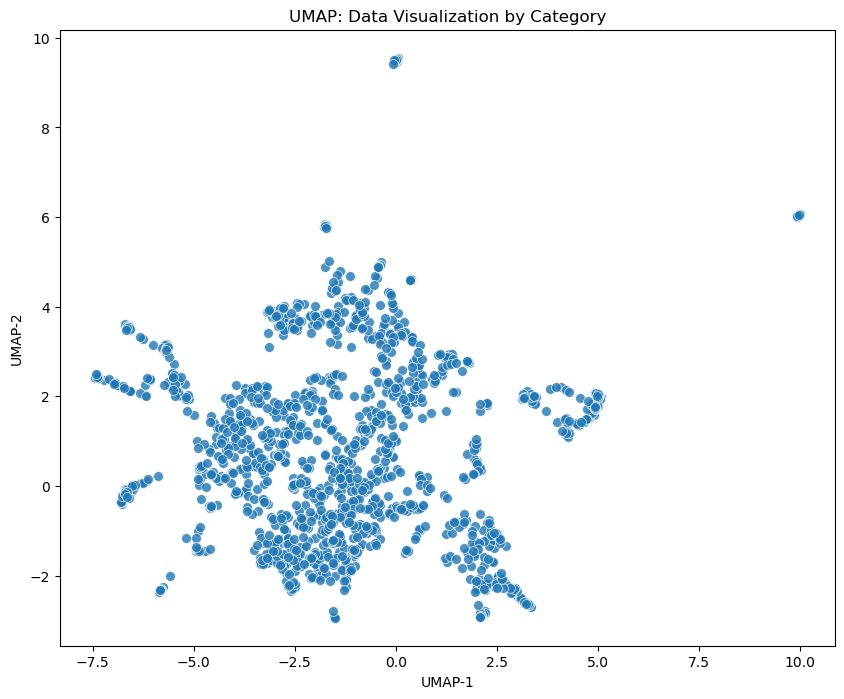

In [285]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(human_paired)
embedding = reducer.fit_transform(human_data)

embedding

embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])
print(embedding_df)
# embedding_df['subject_y'] = ['GallusGallus', 'HomoSapiens', 'InfluenzaA', 'LCMV', 'ManducaSexta', 'MCMV', 'MusMusculus', 
#                              'PlasmodiumBerghei', 'RSV', 'Synthetic', 'VSV']


plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df, palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category')
plt.show()

In [252]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Standardize the dataset
scaler = StandardScaler()
data_standardized = scaler.fit_transform(human_paired)

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_standardized)

In [268]:
# Convert the reduced data back to a DataFrame for easy handling
data_2d_df = pd.DataFrame(data_2d, columns=['Principal Component 1', 'Principal Component 2'])

x=data_2d_df['Principal Component 1']
y=data_2d_df['Principal Component 2']
data_2d_df

,Principal Component 1,Principal Component 2
0,12.780687,-1.739537
1,-21.933315,-2.573200
2,-32.499753,5.891506
3,-32.222325,5.411381
4,44.310913,7.572592
...,...,...
1457,-30.422201,-7.358046
1458,8.130592,-1.895348
1459,-9.467882,-0.856558
1460,37.572469,-14.870002


In [258]:
# Creating the scatter plot
import matplotlib.pyplot as plt

plt.line(x, y)

# Adding title and labels
plt.title('Scatter Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

### TCRDist

from tcrdist.setup_tests import list_available_zip_files
list_available_zip_files()

from tcrdist.setup_tests import download_and_extract_zip_file
#download_and_extract_zip_file( 'dash.zip', source = "dropbox", dest = ".")

In [85]:
tr = TCRrep(cell_df = df_alpha,
            organism = 'mouse',
            chains = ['alpha'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr.pw_alpha

tr.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRAV26-1*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRAV38-2/DV8*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRAV4*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 =

AttributeError: 'TCRrep' object has no attribute 'pw_beta'

In [94]:
tr = TCRrep(cell_df = df_Beta,
            organism = 'mouse',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr.pw_beta
tr.pw_cdr3_b_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRBV13*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRBV7-2*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRBV3-1*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRBV4-1*01 gene was not recognized in reference db no cdr seq could be inferred
  f0 = lambda v : self._map_gene_to_reference_seq2(gene = v,
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:500: UserWarning: TRBV4-2*01 gene was no

array([[ 0, 26, 24, ..., 36, 28, 36],
       [26,  0, 36, ..., 47, 31, 40],
       [24, 36,  0, ..., 40, 32, 28],
       ...,
       [36, 47, 40, ...,  0, 35, 28],
       [28, 31, 32, ..., 35,  0, 28],
       [36, 40, 28, ..., 28, 28,  0]], dtype=int16)

In [98]:
tr.pw_cdr3_b_aa[0]

1948

In [86]:
tr.pw_alpha

array([[  0,   0, 126, ..., 151, 156, 151],
       [  0,   0, 126, ..., 151, 156, 151],
       [126, 126,   0, ..., 117, 138, 150],
       ...,
       [151, 151, 117, ...,   0, 121, 128],
       [156, 156, 138, ..., 121,   0, 112],
       [151, 151, 150, ..., 128, 112,   0]], dtype=int16)